# .                                            Classification 

In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(rc={'figure.figsize':(20,6)})

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [8]:
df_data = pd.read_csv("data/weatherHistory.csv")

In [9]:
df_data_copy = df_data.copy()
df_data_copy.drop(columns = ["Loud Cover"])
df_data_copy.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [10]:
df_data_copy

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [11]:
df_data_copy["y"] = df_data_copy["Precip Type"]
df_data_copy.drop(columns = ["Precip Type"],inplace = True)

In [12]:
df_data_copy["y"].unique()

array(['rain', 'snow', nan], dtype=object)

In [13]:
df_data_copy.isna().sum()

Formatted Date                0
Summary                       0
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
y                           517
dtype: int64

# looks like we can t deal with missing target vlues so that we will drop them 

In [14]:
df_data_copy.dropna(inplace=True)

In [15]:
df_data_copy.isna().sum()

Formatted Date              0
Summary                     0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
y                           0
dtype: int64

In [16]:
df_data_copy["y"].unique() 

array(['rain', 'snow'], dtype=object)

In [17]:
label_encoder_target  = LabelEncoder()
df_data_copy["y_encoded"] = label_encoder_target.fit_transform(df_data_copy["y"])
df_data_copy["y_encoded"]

0        0
1        0
2        0
3        0
4        0
        ..
96448    0
96449    0
96450    0
96451    0
96452    0
Name: y_encoded, Length: 95936, dtype: int32

# EDA

In [18]:
cols = list(df_data_copy.columns)
cols.remove("y")
cols.remove("y_encoded")
cat_cols = ['Formatted Date','Summary','Daily Summary']
cols.remove('Formatted Date')
cols.remove( 'Summary')
cols.remove( 'Daily Summary')
cols

['Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)']

# 1 -  Univariate

In [19]:
def plot_univariate(df_data,col_name,is_log_scalled_box):
    """
    parameters :
        df_data (DataFrame)      : data frame 
        col_name (String)        : the column you want to do univariate analysis on 
        is_log_scalled_box (Bool): if you want to plot the box in log scale or not
    """
    dtf = df_data
    x = col_name
    
    fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
    fig.suptitle(x, fontsize=20)
    ### distribution
    ax[0].title.set_text('distribution')
    
    variable = dtf[x].fillna(dtf[x].mean())
    breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
    variable = variable[ (variable > breaks[0]) & (variable < 
                        breaks[10]) ]
    sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
    des = dtf[x].describe()
    ax[0].axvline(des["25%"], ls='--')
    ax[0].axvline(des["mean"], ls='--')
    ax[0].axvline(des["75%"], ls='--')
    ax[0].grid(True)
    des = round(des, 2).apply(lambda x: str(x))
    box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
    ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
    ### boxplot 
    ax[1].title.set_text('outliers')
    tmp_dtf = pd.DataFrame(dtf[x])
    
    if is_log_scalled_box:
        tmp_dtf[x] = np.log(tmp_dtf[x])
    
    tmp_dtf.boxplot(column=x, ax=ax[1])
    plt.show()

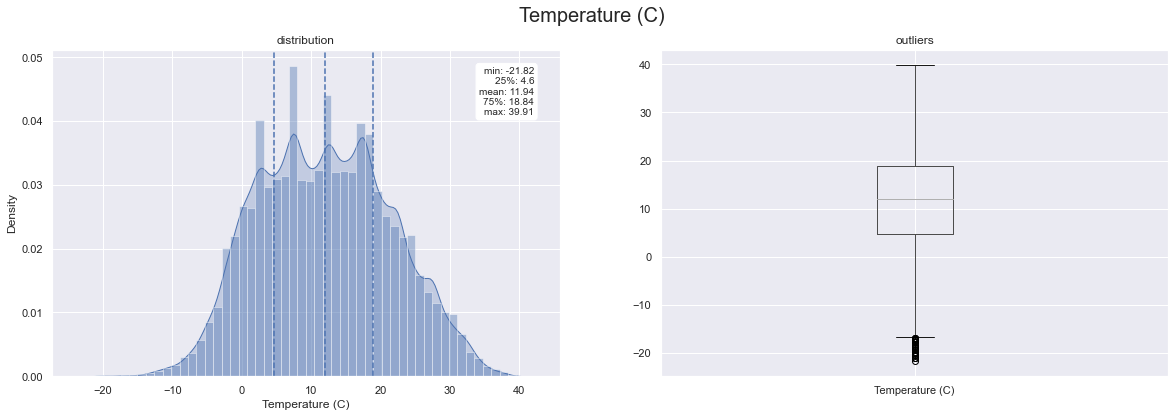

In [20]:
plot_univariate(df_data_copy,"Temperature (C)",False)

### temperature has some very far minios vals but we can t consider it out layers the data is very normally distributed

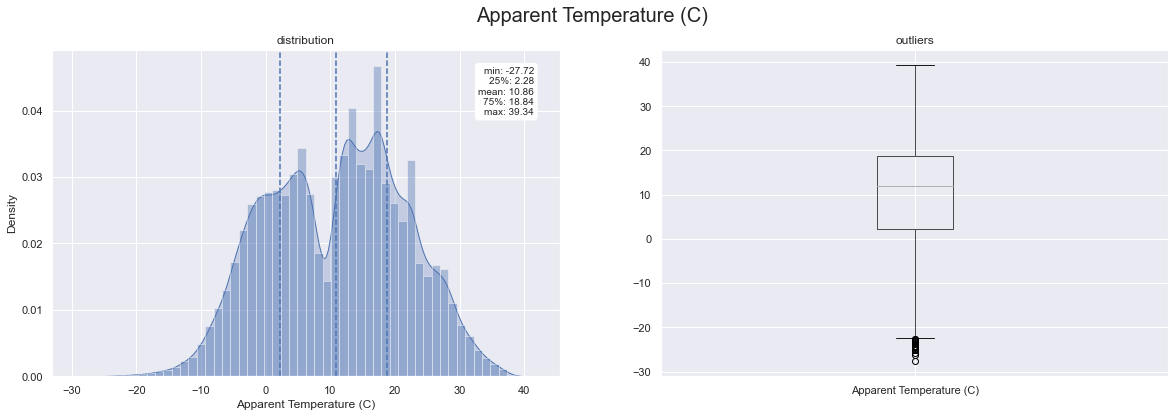

In [21]:
plot_univariate(df_data_copy,'Apparent Temperature (C)',False)

### search how can you deal with two peeks dists

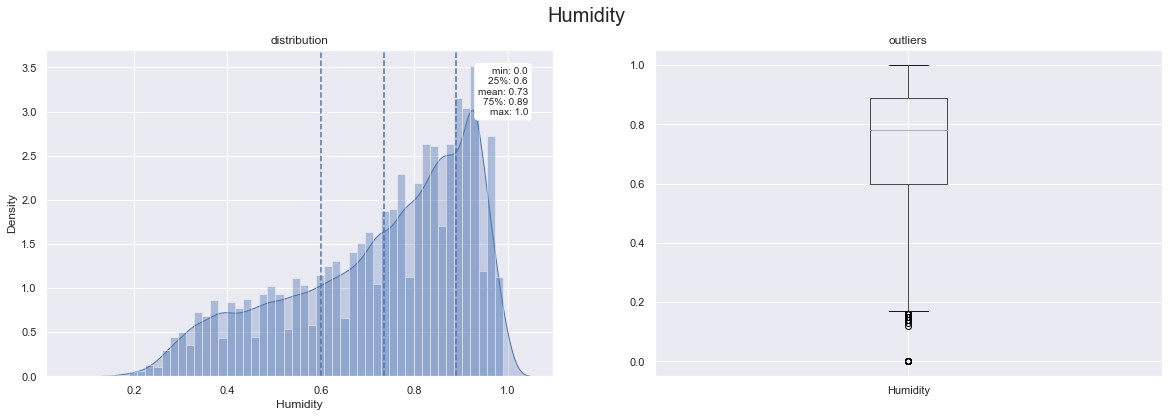

In [22]:
plot_univariate(df_data_copy,'Humidity',False)

### Humidity is kind of right tailed a bit

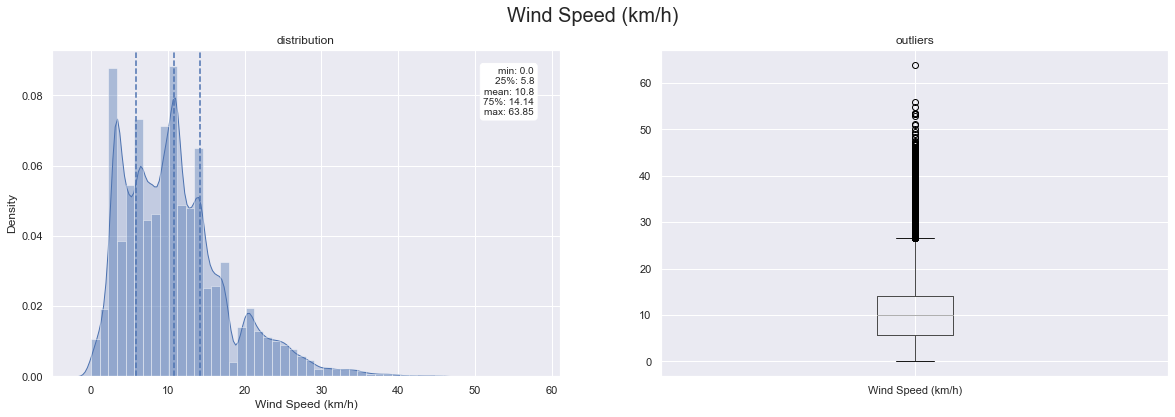

In [23]:
plot_univariate(df_data_copy,'Wind Speed (km/h)',False)

### Wind speed is kind of left tailed a bit

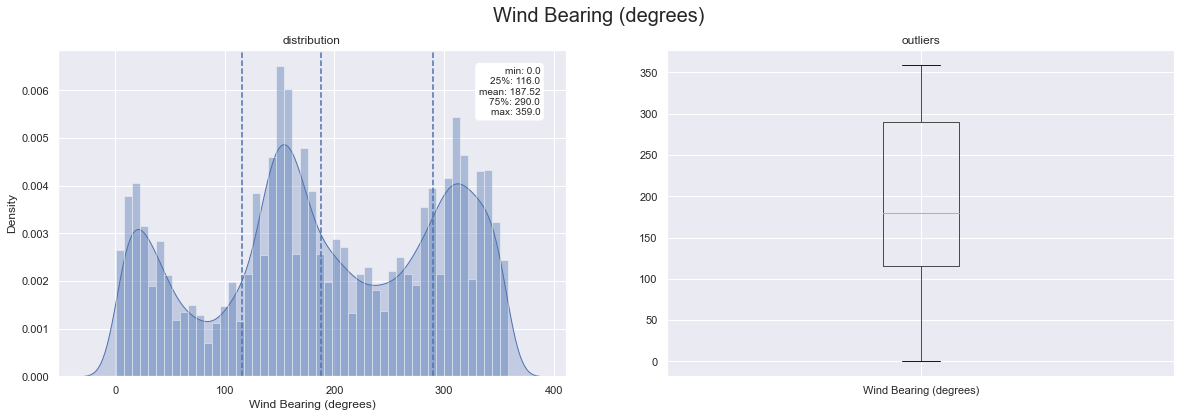

In [24]:
plot_univariate(df_data_copy,'Wind Bearing (degrees)',False)

### search how can you deal with three peeks dists

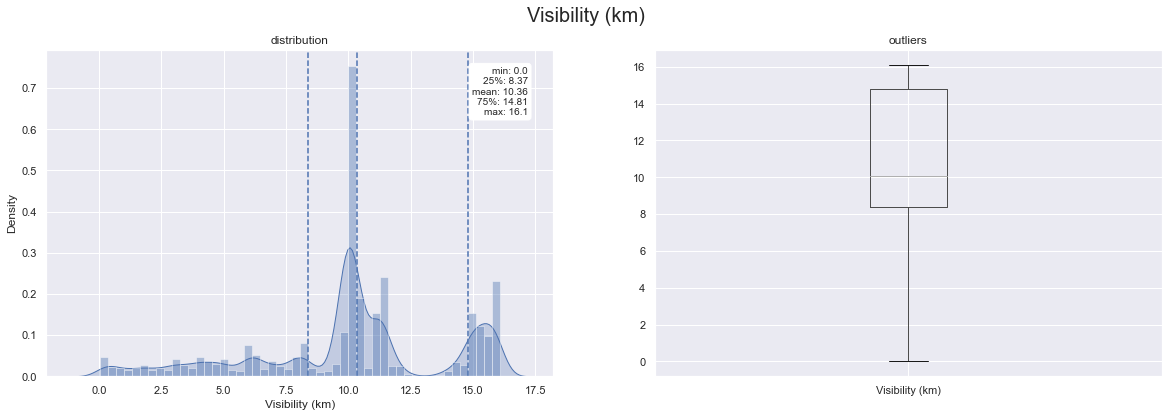

In [25]:
plot_univariate(df_data_copy,'Visibility (km)',False)

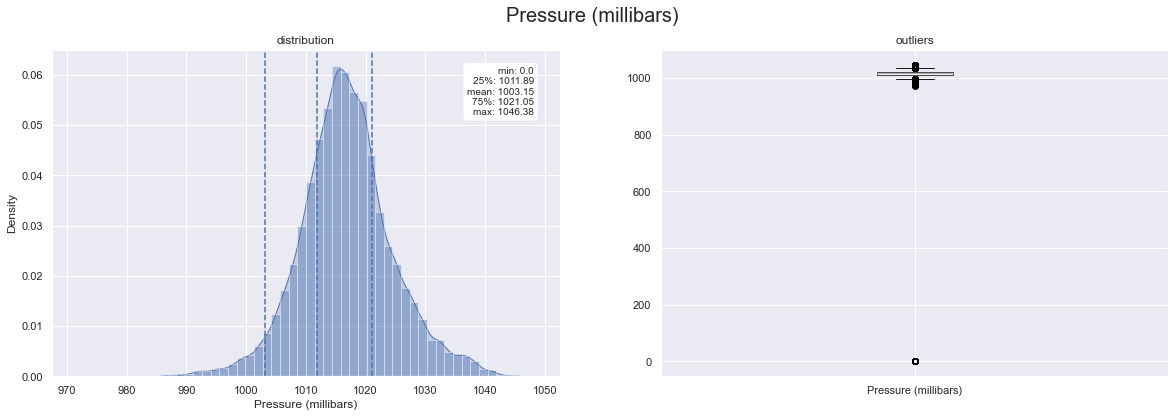

In [26]:
plot_univariate(df_data_copy,'Pressure (millibars)',False)

In [27]:
df_data_copy = df_data_copy[df_data_copy["Pressure (millibars)"] != 0]

### Absolutly Nothing to do Here

# category columns

In [28]:
cat_cols

['Formatted Date', 'Summary', 'Daily Summary']

In [29]:
len(df_data_copy["Summary"].unique())

27

# defining a method for categoricat univariate EDA

In [30]:
def plot_univariate_cat(df,col_name):
    # bar plot (Count plot in seaborn)
    # Value counts is a good thing too
    fig, ax = plt.subplots(nrows=1, ncols=1,  sharex=False, sharey=False)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    sns.countplot(df[col_name], ax=ax)
    print(df[col_name].value_counts())
# sorted_nb = housing.groupby(['Neighborhood'])['SalePrice'].median().sort_values()
# sns.boxplot(x=housing['Neighborhood'], y=housing['SalePrice'], order=list(sorted_nb.index))

Partly Cloudy                          31513
Mostly Cloudy                          27780
Overcast                               16361
Clear                                  10035
Foggy                                   7019
Breezy and Overcast                      525
Breezy and Mostly Cloudy                 511
Breezy and Partly Cloudy                 379
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   63
Light Rain                                63
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Dry                                       34
Windy and Mostly Cloudy                   34
Breezy                                    30
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Humid and Overcast                         7
Windy and 

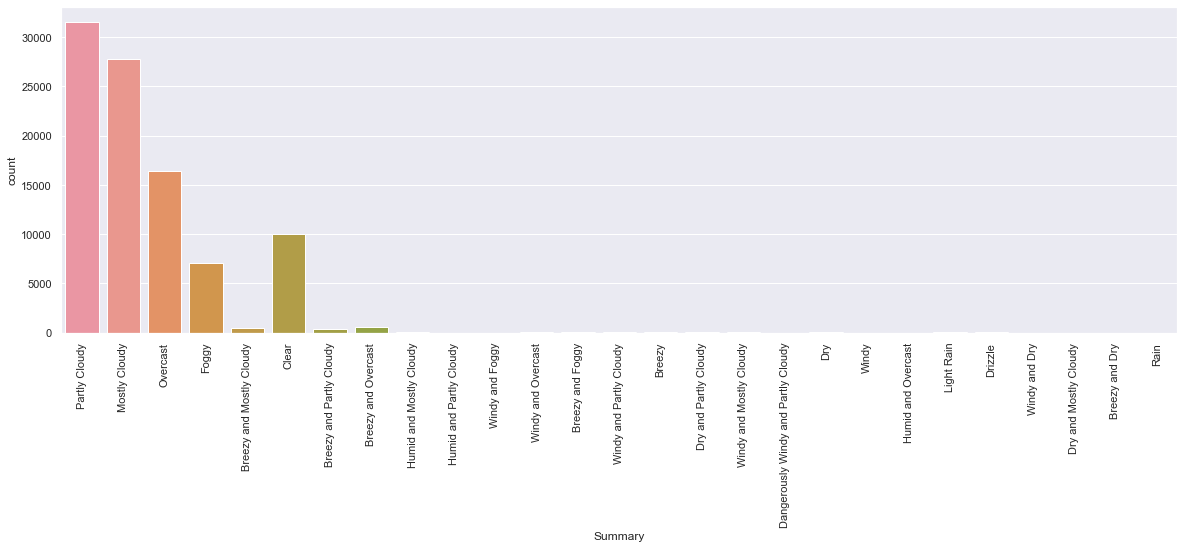

In [31]:
plot_univariate_cat(df_data_copy,"Summary")

In [32]:
#plot_univariate_cat(df_data_copy,"Daily Summary")

# this is messy

# Bivariate

In [33]:
print(cat_cols)
print(cols)

['Formatted Date', 'Summary', 'Daily Summary']
['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']


# Cat Cols with target

In [34]:
def plot_cat_with_target(dtf , col_name ,target_col_name):
    x, y = col_name ,target_col_name
    fig,ax =  plt.subplot(111)
    sns.catplot(x=x, hue=y, data=dtf, kind='count')

In [35]:
df_data_copy.drop(columns=["Loud Cover"],inplace=True)

In [36]:
df_data_copy.columns

Index(['Formatted Date', 'Summary', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary', 'y', 'y_encoded'],
      dtype='object')

# Encodeing cat features 

In [37]:
summary_label_encoder =  LabelEncoder()
df_data_copy["Summary"] = summary_label_encoder.fit_transform(df_data_copy["Summary"])

In [38]:
summary_label_encoder =  LabelEncoder()
df_data_copy["Daily Summary"] = summary_label_encoder.fit_transform(df_data_copy["Daily Summary"])

# Select Features 

In [39]:
selected_features =  [
#'Formatted Date',
'Summary',
'Temperature (C)', 
'Apparent Temperature (C)',
'Humidity',
'Wind Speed (km/h)', 
'Wind Bearing (degrees)',
'Visibility (km)',
'Pressure (millibars)',
#'Daily Summary'
]

# Trying a model 

In [75]:
X_train, X_test, y_train, y_test =  train_test_split(df_data_copy[selected_features], df_data_copy["y_encoded"], test_size=.3)

In [41]:
#logistic regression,
#SVC,
#Decision trees,
#KNN classifier

In [42]:
clf_random_frorest = RandomForestClassifier()
clf_random_frorest.fit(X_train,y_train)
y_pred = clf_random_frorest.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [43]:
clf_log = LogisticRegression()
clf_log.fit(X_train,y_train)
y_pred = clf_log.predict(X_test)
accuracy_score(y_test,y_pred)

0.9979573868638845

In [44]:
clf_svm = make_pipeline(PowerTransformer(), SVC(gamma=.15,C = .9,kernel = 'rbf'))
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
accuracy_score(y_test,y_pred)

0.9922521570699067

# Note 
### SVM without normalization takes too long time and very bad performance about (.94 acc )

In [45]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train,y_train)
y_pred = clf_tree.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [46]:
clf_knn = make_pipeline(PowerTransformer(), SVC(gamma=.15,C = .9,kernel = 'rbf')) 
# Standrizing the data make the model perfom better about removing 90 % of the error rate from 2.8 to .008
#clf_knn = KNeighborsClassifier(n_neighbors= 2)  # 0.9729177672125374
clf_knn.fit(X_train,y_train)
y_pred = clf_knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.9922521570699067

# Implemented Logistic regresion

In [68]:
import math
from sklearn.preprocessing import StandardScaler

In [120]:
class logistic_regression_implemented:
    def __init__(self):
        self.ls_thetas = []
        pass
    def fit(self,input_matrix,outputVector,alpha=30,n_iter= 100):
        input_matrix =  np.concatenate((np.ones(len(input_matrix)).reshape(-1,1),input_matrix), axis = 1)
        m = len(input_matrix)
        lst_thetas = np.zeros(len(input_matrix[0])) 
        learning_Rate = alpha
        loss_vals = []
        
        for i in range(n_iter):
            
            #gettin the predicted data vector 
            predict_data_vector = sigmoid( np.dot(input_matrix,lst_thetas) )
            #GRADIENT VECTOR
            grad_vector = np.dot(input_matrix.T,(predict_data_vector - outputVector))/m
            #updating thetas
            lst_thetas = lst_thetas -  learning_Rate* grad_vector
    
    
        self.ls_thetas = lst_thetas
        print(lst_thetas)
        #return lst_thetas 


    def predict(self, input_matrix):
        input_matrix =  np.concatenate((np.ones(len(input_matrix)).reshape(-1,1),input_matrix), axis = 1)
        return np.round(sigmoid(input_matrix @ self.ls_thetas))
    
def sigmoid(x):
    return 1 / (1 + math.e**((-x)))

In [121]:
logistic_reg_impl = logistic_regression_implemented()
X_train_scaled = StandardScaler().fit_transform(X_train)
logistic_reg_impl.fit(X_train_scaled,y_train)

[-2.81212225e+01 -9.74792161e-02 -1.17908380e+01 -1.01468682e+01
 -6.71638877e-01 -1.70938916e+00 -9.64259897e-03 -4.95295281e-02
 -1.51675796e-01]


In [122]:
X_test_scaled = StandardScaler().fit_transform(X_test)
y_pred = logistic_reg_impl.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.9863708399366086

# 0.9863708399366086 